In [2]:
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns',None)
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings("ignore")

# Import Merged Data

In [3]:
cm = pd.read_csv('Merged_1985-2019.csv')

In [4]:
cm.head()

,tic,conm,LPERMNO,fyear,ni,dv,fincf,ivncf,oancf,ch,gp,xint,lct,dltt,xrent,prcc_f,che,cstkcv,PERMNO,bankrupt,year,quarter
0,AMFD.,A & M FOOD SERVICES INC,10015,1985.0,2.576,0.0,NaN,NaN,NaN,1.688,40.268,1.726,13.922,11.908,1.263,10.125,2.787,NaN,10015,0.0,NaN,NaN
1,ANTQ,A.A. IMPORTING CO INC,10031,1985.0,0.236,0.0,NaN,NaN,NaN,0.005,10.330,0.273,2.643,4.682,1.211,4.500,0.005,0.1,10031,0.0,NaN,NaN
2,ANTQ,A.A. IMPORTING CO INC,10031,1986.0,0.793,0.0,NaN,NaN,NaN,0.241,17.189,0.448,3.378,3.750,2.267,4.500,0.241,0.1,10031,0.0,NaN,NaN
3,ANTQ,A.A. IMPORTING CO INC,10031,1987.0,0.186,0.0,1.744,-0.523,-0.987,0.475,13.589,0.502,2.921,5.478,2.337,2.750,0.475,0.1,10031,0.0,NaN,NaN
4,ANTQ,A.A. IMPORTING CO INC,10031,1988.0,-7.838,0.0,2.223,-0.296,-2.100,0.302,11.088,0.727,16.370,0.104,2.944,1.750,0.302,0.1,10031,0.0,NaN,NaN


# Lag one year ahead #

In [8]:
# year_lag = lag for x years 
# e.g. a row with 2018 data -- year_lag = 2 -- (2018) 2017 2016

def lag(data, year_lag = 2):

    # change the fyear to ascend within every LPERMNO
    data.sort_values(['LPERMNO', 'fyear'], ascending = [True, True], inplace = True)

    # remove irrelevant columns first
    df = data.drop(columns = ['PERMNO','bankrupt','quarter','year'])
    
    # get the columns
    columns = df.columns
    col_to_lag = columns[3:]

    # run the loops to create lag columns to the number of lagged year
    for lag in range(1, year_lag+1):
        for colname in col_to_lag:
            df[f'{colname}'+ '_lag' + f'{lag}'] = df[f'{colname}'].shift((lag-1))

    # add back the bankrupt info
    df['bankrupt'] = data['bankrupt']
    df['year'] = data['year']
    df['quarter'] = data['quarter']

    # keep the new lagged columns and remove the original one
    df.drop(col_to_lag, axis=1, inplace = True)

    # drop the last row of each LPERMNO after lagging one year
    df = df.groupby(['LPERMNO']).apply(lambda x: x.iloc[1:])
    df = df.set_index('LPERMNO').reset_index()    
    
    # identify the real bankrupt row
    for i in range(len(df)):
        if (df['bankrupt'][i] == 1) & (df['year'][i] - df['fyear_lag1'][i] == 1):
            df['bankrupt'][i] = 1
        else:
            df['bankrupt'][i] = 0

    df['predict_year'] = df['fyear_lag1']+1

    return df

# cmcm = lag(cm[cm['tic'] == 'TSLA'],2)
cmcm = lag(cm ,2)
cmcm.head()

,LPERMNO,tic,conm,fyear_lag1,ni_lag1,dv_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,dltt_lag1,xrent_lag1,prcc_f_lag1,che_lag1,cstkcv_lag1,fyear_lag2,ni_lag2,dv_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,dltt_lag2,xrent_lag2,prcc_f_lag2,che_lag2,cstkcv_lag2,bankrupt,year,quarter,predict_year
0,10001,EGAS,GAS NATURAL INC,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150,1986.0,0.669,0.365,NaN,NaN,NaN,NaN,1.895,0.332,2.259,2.946,NaN,6.000,0.746,0.150,0.0,NaN,NaN,1988.0
1,10001,EGAS,GAS NATURAL INC,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150,1987.0,0.312,0.416,NaN,NaN,NaN,NaN,1.083,0.303,1.983,2.750,NaN,5.875,0.729,0.150,0.0,NaN,NaN,1989.0
2,10001,EGAS,GAS NATURAL INC,1989.0,1.208,0.459,3.887,-5.687,1.772,1.177,3.054,0.651,2.725,7.370,NaN,7.000,1.177,0.150,1988.0,0.564,0.427,NaN,NaN,NaN,NaN,1.422,0.311,1.894,2.555,NaN,6.250,0.744,0.150,0.0,NaN,NaN,1990.0
3,10001,EGAS,GAS NATURAL INC,1990.0,1.131,0.523,-0.559,-1.156,1.894,1.356,3.320,0.835,2.264,7.175,NaN,9.750,1.356,0.150,1989.0,1.208,0.459,3.887,-5.687,1.772,1.177,3.054,0.651,2.725,7.370,NaN,7.000,1.177,0.150,0.0,NaN,NaN,1991.0
4,10001,EGAS,GAS NATURAL INC,1991.0,1.073,0.594,-0.562,-1.152,1.954,1.595,3.168,0.775,2.215,6.965,NaN,10.500,1.595,0.150,1990.0,1.131,0.523,-0.559,-1.156,1.894,1.356,3.320,0.835,2.264,7.175,NaN,9.750,1.356,0.150,0.0,NaN,NaN,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203603,93436,TSLA,TESLA INC,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.2,240.010,1219.536,0.001,2014.0,-294.040,0.000,2143.130,-990.444,-57.337,1905.713,1113.602,113.648,2107.166,1818.785,46.3,222.410,1923.660,0.001,0.0,NaN,NaN,2016.0
203604,93436,TSLA,TESLA INC,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.8,213.690,3498.735,0.001,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.2,240.010,1219.536,0.001,0.0,NaN,NaN,2017.0
203605,93436,TSLA,TESLA INC,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.7,311.350,3523.237,0.001,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.8,213.690,3498.735,0.001,0.0,NaN,NaN,2018.0
203606,93436,TSLA,TESLA INC,2018.0,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.6,332.800,3878.169,0.001,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.7,311.350,3523.237,0.001,0.0,NaN,NaN,2019.0


In [16]:
cmcm['bankrupt'].value_counts()

0.0    203098
1.0       510
Name: bankrupt, dtype: int64

In [17]:
cmcm[cmcm['predict_year'] != 2020]['bankrupt'].value_counts()

0.0    201136
1.0       510
Name: bankrupt, dtype: int64

In [19]:
cmcm = cmcm.dropna(subset = cmcm.columns[4:33])
cmcm[cmcm['predict_year'] != 2020]['bankrupt'].value_counts()

0.0    98422
1.0      302
Name: bankrupt, dtype: int64

# Base model #

In [62]:
# Plan 1: Drop all the missing values. Change all the 0 value to a small number. Only 99283 rows left, abount 50% of the data.
cm1 = cm.dropna(subset= cm.columns[4:33])
cm1['predict_year']=cm1['fyear_lag1']+1
cm1

,LPERMNO,tic,conm,fyear_lag1,ni_lag1,dv_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,dltt_lag1,xrent_lag1,prcc_f_lag1,che_lag1,cstkcv_lag1,fyear_lag2,ni_lag2,dv_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,dltt_lag2,xrent_lag2,prcc_f_lag2,che_lag2,cstkcv_lag2,bankrupt,year,quarter,predict_year
17,10001,EGAS,GAS NATURAL INC,2004.0,-0.556,0.000,6.402,-1.146,-5.872,1.323,3.520,2.498,16.725,21.697,0.172,6.66,1.323,0.150,2003.0,-0.089,1.082,1.099,-4.074,4.546,1.939,3.571,1.633,21.569,14.834,0.190,6.01,1.939,0.150,0.0,NaN,NaN,2005.0
18,10001,EGAS,GAS NATURAL INC,2005.0,1.381,0.000,-0.106,-2.467,1.344,0.094,6.679,2.677,11.525,18.677,0.143,9.05,0.094,0.150,2004.0,-0.556,0.000,6.402,-1.146,-5.872,1.323,3.520,2.498,16.725,21.697,0.172,6.66,1.323,0.150,0.0,NaN,NaN,2006.0
19,10001,EGAS,GAS NATURAL INC,2006.0,2.317,0.494,-5.400,-2.212,9.158,1.640,7.451,2.079,10.143,17.605,0.143,9.02,1.640,0.150,2005.0,1.381,0.000,-0.106,-2.467,1.344,0.094,6.679,2.677,11.525,18.677,0.143,9.05,0.094,0.150,0.0,NaN,NaN,2007.0
20,10001,EGAS,GAS NATURAL INC,2007.0,6.212,1.518,-9.178,15.819,-1.271,7.010,7.104,2.124,7.694,13.000,0.091,15.00,7.010,0.150,2006.0,2.317,0.494,-5.400,-2.212,9.158,1.640,7.451,2.079,10.143,17.605,0.143,9.02,1.640,0.150,0.0,NaN,NaN,2008.0
23,10001,EGAS,GAS NATURAL INC,2010.0,5.797,3.452,7.972,-4.425,6.727,13.027,15.199,2.178,38.917,21.959,0.406,10.52,13.302,0.150,2009.0,6.819,2.279,-5.429,-9.185,16.301,2.752,11.276,1.241,27.428,13.003,0.239,10.30,7.163,0.150,0.0,NaN,NaN,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203603,93436,TSLA,TESLA INC,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.01,1219.536,0.001,2014.0,-294.040,0.000,2143.130,-990.444,-57.337,1905.713,1113.602,113.648,2107.166,1818.785,46.300,222.41,1923.660,0.001,0.0,NaN,NaN,2016.0
203604,93436,TSLA,TESLA INC,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.69,3498.735,0.001,2015.0,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.01,1219.536,0.001,0.0,NaN,NaN,2017.0
203605,93436,TSLA,TESLA INC,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.35,3523.237,0.001,2016.0,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.69,3498.735,0.001,0.0,NaN,NaN,2018.0
203606,93436,TSLA,TESLA INC,2018.0,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.600,332.80,3878.169,0.001,2017.0,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.35,3523.237,0.001,0.0,NaN,NaN,2019.0


In [63]:
cm1['fyear_lag1'] = cm1['fyear_lag1'].astype(int).astype(str)
cm1['fyear_lag1'] = cm1['fyear_lag1'].apply(lambda x:datetime.datetime.strptime(x,'%Y').year)
cm1['fyear_lag2'] = cm1['fyear_lag2'].astype(int).astype(str)
cm1['fyear_lag2'] = cm1['fyear_lag2'].apply(lambda x:datetime.datetime.strptime(x,'%Y').year)
cm1['predict_year'] = cm1['predict_year'].astype(int).astype(str)
cm1['predict_year'] = cm1['predict_year'].apply(lambda x:datetime.datetime.strptime(x,'%Y').year)
cm1

,LPERMNO,tic,conm,fyear_lag1,ni_lag1,dv_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,dltt_lag1,xrent_lag1,prcc_f_lag1,che_lag1,cstkcv_lag1,fyear_lag2,ni_lag2,dv_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,dltt_lag2,xrent_lag2,prcc_f_lag2,che_lag2,cstkcv_lag2,bankrupt,year,quarter,predict_year
17,10001,EGAS,GAS NATURAL INC,2004,-0.556,0.000,6.402,-1.146,-5.872,1.323,3.520,2.498,16.725,21.697,0.172,6.66,1.323,0.150,2003,-0.089,1.082,1.099,-4.074,4.546,1.939,3.571,1.633,21.569,14.834,0.190,6.01,1.939,0.150,0.0,NaN,NaN,2005
18,10001,EGAS,GAS NATURAL INC,2005,1.381,0.000,-0.106,-2.467,1.344,0.094,6.679,2.677,11.525,18.677,0.143,9.05,0.094,0.150,2004,-0.556,0.000,6.402,-1.146,-5.872,1.323,3.520,2.498,16.725,21.697,0.172,6.66,1.323,0.150,0.0,NaN,NaN,2006
19,10001,EGAS,GAS NATURAL INC,2006,2.317,0.494,-5.400,-2.212,9.158,1.640,7.451,2.079,10.143,17.605,0.143,9.02,1.640,0.150,2005,1.381,0.000,-0.106,-2.467,1.344,0.094,6.679,2.677,11.525,18.677,0.143,9.05,0.094,0.150,0.0,NaN,NaN,2007
20,10001,EGAS,GAS NATURAL INC,2007,6.212,1.518,-9.178,15.819,-1.271,7.010,7.104,2.124,7.694,13.000,0.091,15.00,7.010,0.150,2006,2.317,0.494,-5.400,-2.212,9.158,1.640,7.451,2.079,10.143,17.605,0.143,9.02,1.640,0.150,0.0,NaN,NaN,2008
23,10001,EGAS,GAS NATURAL INC,2010,5.797,3.452,7.972,-4.425,6.727,13.027,15.199,2.178,38.917,21.959,0.406,10.52,13.302,0.150,2009,6.819,2.279,-5.429,-9.185,16.301,2.752,11.276,1.241,27.428,13.003,0.239,10.30,7.163,0.150,0.0,NaN,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203603,93436,TSLA,TESLA INC,2015,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.01,1219.536,0.001,2014,-294.040,0.000,2143.130,-990.444,-57.337,1905.713,1113.602,113.648,2107.166,1818.785,46.300,222.41,1923.660,0.001,0.0,NaN,NaN,2016
203604,93436,TSLA,TESLA INC,2016,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.69,3498.735,0.001,2015,-888.663,0.000,1523.523,-1673.551,-524.499,1196.908,1346.093,160.328,2816.274,2040.375,68.200,240.01,1219.536,0.001,0.0,NaN,NaN,2017
203605,93436,TSLA,TESLA INC,2017,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.35,3523.237,0.001,2016,-674.914,0.000,3743.976,-1416.430,-123.829,3393.216,2546.356,245.501,5827.005,6053.860,116.800,213.69,3498.735,0.001,0.0,NaN,NaN,2018
203606,93436,TSLA,TESLA INC,2018,-976.091,0.000,573.755,-2337.428,2097.802,3685.618,5929.807,717.971,9992.136,9454.055,182.600,332.80,3878.169,0.001,2017,-1961.400,0.000,4414.864,-4418.967,-60.654,3367.914,3858.490,596.172,7674.670,9486.248,177.700,311.35,3523.237,0.001,0.0,NaN,NaN,2019


# Oversampling and Undersampling

In [64]:
def oversampling(data, y_label, k = 5, seed = 1):
    
    from imblearn.over_sampling import SMOTE

    X = data.loc[:, data.columns != y_label]
    y = data[y_label]

    sm = SMOTE(sampling_strategy = 'auto', k_neighbors = k, random_state = seed)

    X_res, y_res = sm.fit_resample(X, y)
    
    return X_res, y_res


def undersampling(data, y_label, n = 3):

    from imblearn.under_sampling import NearMiss

    X = data.loc[:, data.columns != y_label]
    y = data[y_label]

    nm = NearMiss(sampling_strategy = 'auto')

    X_res, y_res = nm.fit_resample(X, y)
    
    return X_res, y_res

In [65]:
cm1_sm = cm1.drop(['LPERMNO','tic','conm', 'year', 'quarter','fyear_lag1','fyear_lag2'],axis=1)

print(len(cm1_sm))

cm1_sm['bankrupt'].value_counts()

99283


0.0    98981
1.0      302
Name: bankrupt, dtype: int64

In [66]:
#!pip install imblearn 

In [67]:
x, y = oversampling(cm1_sm, 'bankrupt')

cm1_smote = pd.merge(x, y, left_index = True, right_index = True)

print(len(cm1_smote))

cm1_smote['bankrupt'].value_counts()

197962


1.0    98981
0.0    98981
Name: bankrupt, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## Cross Validation 

In [97]:
from sklearn.model_selection import KFold 

def model_cross_validation(model,X,y,K):
    X = X.to_numpy()
    y = y.to_numpy()
    kf=KFold(K,shuffle=True)
    folds=list(kf.split(X))
    kfolds=len(folds)
    train_performance=np.empty(kfolds)
    validation_performance=np.empty(kfolds)
    for idx in range(kfolds):
        train,validation=folds[idx] # this give us the indexes of train and validation datapoints in current fold
        X_train=X[train]
        y_train=y[train]
        model.fit(X_train,y_train)
        train_accuracy=np.average(model.predict(X_train)==y_train)
        X_validation=X[validation]
        y_validation=y[validation]
        validation_accuracy=np.average(model.predict(X_validation)==y_validation)
        train_performance[idx]=train_accuracy
        validation_performance[idx]=validation_accuracy
    return train_performance,validation_performance

In [99]:
cross_validation = {}

## Logistic model without scaling

In [89]:
y_train

51694     0.0
31981     0.0
83692     0.0
123817    1.0
173869    1.0
         ... 
119879    1.0
103694    1.0
131932    1.0
146867    1.0
121958    1.0
Name: bankrupt, Length: 138573, dtype: float64

In [100]:
# x = cm1.drop(['LPERMNO','tic','conm','fyear_lag1','fyear_lag2','bankrupt','predict_year','year','quarter'],axis=1)
x = cm1_smote.drop(['bankrupt'],axis=1)

y = cm1_smote['bankrupt']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
model = LogisticRegression()
train_performance,validation_performance = model_cross_validation(model,x_train,y_train,10)
cross_validation['Logistic model without scaling'] = (np.mean(train_performance), np.mean(validation_performance))
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Accuracy: ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=5))

Accuracy:  0.8371247200660055
              precision    recall  f1-score   support

         0.0    0.90746   0.74815   0.82014     29478
         1.0    0.78841   0.92481   0.85118     29911

    accuracy                        0.83712     59389
   macro avg    0.84793   0.83648   0.83566     59389
weighted avg    0.84750   0.83712   0.83577     59389



<Figure size 432x288 with 0 Axes>

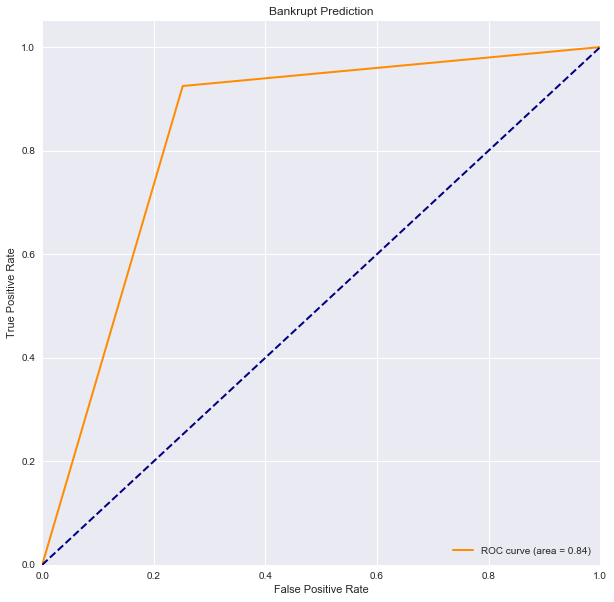

In [71]:
fpr,tpr,threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bankrupt Prediction')
plt.legend(loc="lower right")
plt.show()

## Logistic model with scaling

In [102]:
scaler = StandardScaler()

x1 = pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index=x.index)

y1 = y

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)
model1 = LogisticRegression()
train_performance,validation_performance = model_cross_validation(model,x1_train,y1_train,10)
cross_validation['Logistic model with scaling'] = (np.mean(train_performance), np.mean(validation_performance))
model1.fit(x1_train,y1_train)
y1_pred = model1.predict(x1_test)

print('Accuracy: ',accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred, digits=5))

Accuracy:  0.8390442674569365
              precision    recall  f1-score   support

         0.0    0.90739   0.75253   0.82274     29478
         1.0    0.79123   0.92431   0.85261     29911

    accuracy                        0.83904     59389
   macro avg    0.84931   0.83842   0.83767     59389
weighted avg    0.84889   0.83904   0.83778     59389



## Logistic model using categorical variables

In [73]:
# I use the data without scaling because it performs better than with scaling.
x2 = x.copy()

In [74]:
# dv, dltt, cstkcv can not be divided into 10 different groups so I will deal with others first.
x2 = x2.drop(['dv_lag1','dv_lag2','dltt_lag1','dltt_lag2','cstkcv_lag1','cstkcv_lag2'],axis=1)

In [75]:
# Categorical from 1 to 10 (so in the future maybe we can set NA and inf to 0)
for col in x2.columns:
    x2[col] = pd.qcut(x2[col],10,labels=np.arange(1,11))

In [76]:
x3 = x.copy()[['dv_lag1','dv_lag2','dltt_lag1','dltt_lag2','cstkcv_lag1','cstkcv_lag2']]

In [77]:
# They can only be divided into 3 categories.
for col in x3.columns:
    x3[col] = pd.qcut(x3[col],3,labels=np.arange(1,4))

In [78]:
x2 = x2.join(x3)

In [79]:
x2

,ni_lag1,fincf_lag1,ivncf_lag1,oancf_lag1,ch_lag1,gp_lag1,xint_lag1,lct_lag1,xrent_lag1,prcc_f_lag1,che_lag1,ni_lag2,fincf_lag2,ivncf_lag2,oancf_lag2,ch_lag2,gp_lag2,xint_lag2,lct_lag2,xrent_lag2,prcc_f_lag2,che_lag2,predict_year,dv_lag1,dv_lag2,dltt_lag1,dltt_lag2,cstkcv_lag1,cstkcv_lag2
0,7,6,7,3,2,2,4,3,1,7,2,6,5,7,6,3,2,4,3,1,5,2,6,1,3,2,2,3,3
1,7,4,7,5,1,3,4,2,1,7,1,6,6,8,3,2,2,5,3,1,5,2,7,1,1,2,2,3,3
2,8,3,7,7,3,3,4,2,1,7,2,7,4,7,5,1,2,5,3,1,6,1,7,3,1,2,2,3,3
3,8,3,10,4,5,3,4,2,1,8,4,7,3,7,6,2,2,4,2,1,6,2,7,3,3,2,2,3,3
4,8,7,6,6,6,3,4,4,1,8,5,8,3,6,7,3,3,3,4,1,7,4,9,3,3,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197957,4,7,10,2,5,1,3,2,3,1,5,3,8,7,1,4,1,3,1,4,4,6,2,1,1,2,1,1,1
197958,6,5,6,5,2,3,2,2,6,4,2,6,5,6,6,3,3,2,2,6,2,3,6,1,1,1,1,1,1
197959,2,9,2,4,7,7,9,7,8,5,6,3,10,2,8,8,7,9,8,8,8,8,5,3,3,3,3,1,1
197960,3,7,8,2,2,3,4,4,4,1,2,3,8,6,1,5,2,3,3,3,5,5,6,1,1,2,2,3,3


In [104]:
y2 = y
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=42)
model2 = LogisticRegression()
train_performance,validation_performance = model_cross_validation(model,x2_train,y2_train,10)
cross_validation['Logistic model using categorical variables'] = (np.mean(train_performance), np.mean(validation_performance))
model2.fit(x2_train,y2_train)
y2_pred = model2.predict(x2_test)

print('Accuracy: ',accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred, digits=5))

Accuracy:  0.8948626850090085
              precision    recall  f1-score   support

         0.0    0.90480   0.88086   0.89267     29478
         1.0    0.88557   0.90866   0.89697     29911

    accuracy                        0.89486     59389
   macro avg    0.89519   0.89476   0.89482     59389
weighted avg    0.89512   0.89486   0.89483     59389



In [105]:
cross_validation

{'Logistic model without scaling': (0.8362828402097172, 0.8358193549928521),
 'Logistic model with scaling': (0.8398285058791288, 0.8396801820437656),
 'Logistic model using categorical variables': (0.8941055527768199,
  0.8941857073330913)}

# Exploratory Data Analysis #

In [81]:
#! pip install pandas-profiling

In [82]:
# import pandas_profiling
# profile = pandas_profiling.ProfileReport(cm1)
# profile.to_file(outputfile = 'Profile.html')
# profile